In [2]:
import pandas as pd
import numpy as np
from sympy import symbols
from sympy.plotting import plot 
import matplotlib.pyplot as plt

# Criando a Classe 

In [3]:
class Perceptron():
    
    def __init__(self, x1, x2, x3):
        
        self.w = [x1,x2,x3]
        
    def model(self, x): ## X is a data with len = 3
        
        return np.sign((np.dot(self.w,x)))
    
    def ajuste(self, X, Y):
        
        for i in range(len(X)):
            
            if self.model(X[i]) != Y[i]:
                
                for j in range(len(X[i])):

                    self.w[j] = self.w[j] + X[i][j]*Y[i]
#                     print("ajuste no {}".format(i))
#                 print("{} ajustado".format(i))
                
        return self.w
    
    def accuracy(self, X, Y):

        count = 0
        
        for i in range(len(X)):
            
            if self.model(X[i]) == Y[i]:
                count += 1
        
        acc = count/len(X)
        count = 0
        return acc
    
    def train(self, X, Y, epochs):
        
        G = []
        acc = self.accuracy(X, Y)
        
        for i in range(epochs):
            
            if acc < 1:
            
                G = self.ajuste(X,Y)
                new_acc = self.accuracy(X,Y)
                
                if new_acc > acc:
                    acc = new_acc
                print("{:.2f}% de acuracia".format(acc*100))

        return G, acc
        
        
                

# Fazendo a base

In [4]:
p = Perceptron(2,3,1)

In [5]:
X_train = []
Y_train = []

for i in range(1000):
    
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    X_train.append([x,y,1])
    
    Y_train.append(p.model(X_train[i]))

In [6]:
X_train, Y_train

([[-0.7871371210264022, -0.8042451391080931, 1],
  [0.4642512823458895, -0.7819818812852579, 1],
  [-0.4675481937680981, 0.9778943585398807, 1],
  [0.05728488033083856, -0.863602314513614, 1],
  [0.07213457450667282, -0.7922067118709173, 1],
  [0.7949687137581902, -0.36531557968434414, 1],
  [-0.9940804651480313, 0.6612293595364529, 1],
  [-0.15190541641587663, -0.8018779535202858, 1],
  [-0.87057711721898, 0.6167248987455884, 1],
  [-0.5035022526502575, -0.968466768915532, 1],
  [-0.8100678730310502, -0.3444794539070992, 1],
  [-0.5592879256295193, 0.7849041623027633, 1],
  [-0.4343872340817656, -0.7286175133080961, 1],
  [-0.17857420897775, 0.39237239338344554, 1],
  [0.9176084093880139, -0.5426900468283273, 1],
  [0.8085686342202978, 0.8118897125101432, 1],
  [-0.9286277496663422, -0.16117544177944643, 1],
  [-0.36258590926112144, -0.4009565365107026, 1],
  [0.8822847034995394, -0.9519629683048934, 1],
  [0.6711117073221653, -0.0702194669771179, 1],
  [-0.3202911029200324, -0.005123

# Classificando os Dados

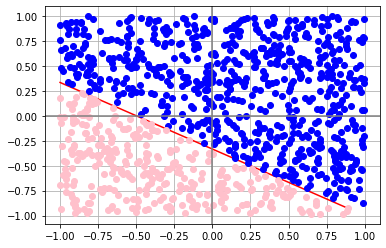

In [7]:
x = np.arange(-1,1,.1)
y = np.arange(-1,1,.1)

z = -(p.w[0]*x + p.w[2])/p.w[1]

plt.plot(x, z, color = "red")

for i in range(0, len(X_train)):
    
    if (Y_train[i] == 1):
        
        plt.plot(X_train[i][0], X_train[i][1], "o", color="blue")
        
    elif (Y_train[i] == -1):
        
        plt.plot(X_train[i][0], X_train[i][1], "o", color="pink")

plt.grid(True, which='both')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')        

plt.show()

# Gerando nossa Hipótese inicial 

In [8]:
x = np.random.uniform(-1, 1)
y = np.random.uniform(-1, 1)
z = np.random.uniform(-1, 1)

g = Perceptron(x,y,z)

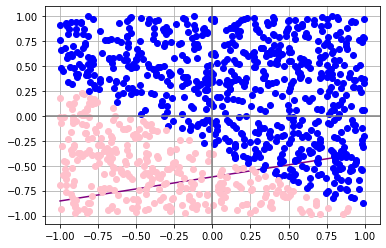

In [9]:
x = np.arange(-1,1,.1)
y = np.arange(-1,1,.1)

z = -(g.w[0]*x + g.w[2])/g.w[1]

plt.plot(x, z, color = "purple")

for i in range(0, len(X_train)):
    
    if (Y_train[i] == 1):
        
        plt.plot(X_train[i][0], X_train[i][1], "o", color="blue")
        
    elif (Y_train[i] == -1):
        
        plt.plot(X_train[i][0], X_train[i][1], "o", color="pink")

plt.grid(True, which='both')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')        

plt.show()

# Ajsutando os pesos com base no erro 

In [13]:
G, acc = g.train(X_train, Y_train, epochs = 20)

99.90% de acuracia
99.90% de acuracia
100.00% de acuracia


# Plot da Hipotese final 

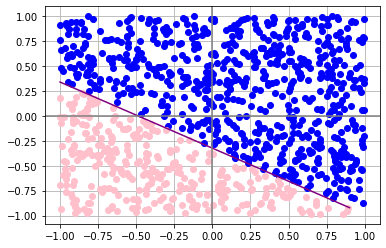

In [14]:
x = np.arange(-1,1,.1)
y = np.arange(-1,1,.1)

z = -(G[0]*x + G[2])/G[1]

for i in range(0, len(X_train)):
    
    if (Y_train[i] == 1):
        
        plt.plot(X_train[i][0], X_train[i][1], "o", color="blue")
        
    elif (Y_train[i] == -1):
        
        plt.plot(X_train[i][0], X_train[i][1], "o", color="pink")

plt.plot(x, z, color = "purple")
        
plt.grid(True, which='both')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')        

plt.show()

In [15]:
print("{:.2f}% de acuracia".format(acc*100))

100.00% de acuracia
